In [1]:
import pandas as pd
from pathlib import Path
import datetime
import yfinance as yf

In [2]:
#India_csv = Path("Vanguard-Group/India Cases Covid.csv")
India_csv = Path('C:/Users/14259/Desktop/Kevin/UW/FinTech-Bootcamp/homework/Vanguard-Group/India Cases Covid.csv')
India_coronavirus_data = pd.read_csv(India_csv, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
India_coronavirus_data.head()

,Sno,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
Date,,,,,,,,
2020-01-30,1,6:00 PM,Kerala,1,0,0,0,1
2020-01-31,2,6:00 PM,Kerala,1,0,0,0,1
2020-02-01,3,6:00 PM,Kerala,2,0,0,0,2
2020-02-02,4,6:00 PM,Kerala,3,0,0,0,3
2020-02-03,5,6:00 PM,Kerala,3,0,0,0,3


In [3]:
India_coronavirus_data.drop(columns = ['Sno','Time','State/UnionTerritory','ConfirmedIndianNational','ConfirmedForeignNational','Cured'], inplace = True)
India_coronavirus_data.rename(columns={'Deaths' : 'India Deaths', 'Confirmed' : 'India Confirmed'}, inplace = True)

In [4]:
India_coronavirus_data.isnull().sum()


India Deaths       0
India Confirmed    0
dtype: int64

In [5]:
India_coronavirus_data = India_coronavirus_data.groupby([India_coronavirus_data.index]).sum()
India_coronavirus_data.head()

,India Deaths,India Confirmed
Date,,
2020-01-30,0,1
2020-01-31,0,1
2020-02-01,0,2
2020-02-02,0,3
2020-02-03,0,3


In [7]:
India_coronavirus_data = India_coronavirus_data.pct_change()
India_coronavirus_data.head()

,India Deaths,India Confirmed
Date,,
2020-01-30,NaN,NaN
2020-01-31,NaN,NaN
2020-02-01,NaN,inf
2020-02-02,NaN,-0.5
2020-02-03,NaN,-1.0


In [9]:
stock = '^BSESN'
sensex = yf.download(stock,'2020-01-01', '2020-10-02')
sensex_df = pd.DataFrame(sensex)

[*********************100%***********************]  1 of 1 completed


In [10]:
sensex_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,41340.269531,41649.289062,41328.449219,41626.640625,41626.640625,5300
2020-01-03,41634.511719,41636.179688,41348.679688,41464.609375,41464.609375,8900
2020-01-06,41378.339844,41378.339844,40613.960938,40676.628906,40676.628906,8700
2020-01-07,40983.039062,41230.140625,40727.371094,40869.468750,40869.468750,11900
2020-01-08,40574.828125,40866.359375,40476.550781,40817.738281,40817.738281,18200


In [11]:
sensex_df.drop(columns =['Open','High','Low','Adj Close','Volume'], inplace = True)

In [12]:
sensex_df = sensex_df.groupby(by=[sensex_df.index]).sum()

In [13]:
sensex_df = sensex_df.pct_change()

In [15]:
sensex_df.head()

,Close
Date,
2020-01-02,NaN
2020-01-03,-0.003892
2020-01-06,-0.019004
2020-01-07,0.004741
2020-01-08,-0.001266


In [16]:
india = pd.concat([sensex_df, India_coronavirus_data], join ='inner', axis = 'columns')

In [149]:
india.dropna(inplace = True)

In [150]:
india.head()

,Close,India Deaths,India Confirmed
Date,,,
2020-03-13,0.040434,inf,0.094595
2020-03-16,-0.079564,0.000000,0.036364
2020-03-17,-0.025836,0.500000,0.201754
2020-03-18,-0.055907,0.000000,0.102190
2020-03-19,-0.020135,0.333333,0.145695


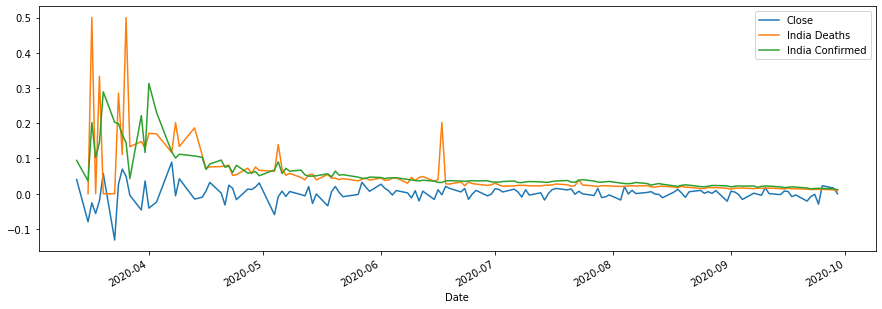

In [151]:
india.plot(figsize = (15,5))

In [154]:
india_correlation = india.corr()
india_correlation

,Close,India Deaths,India Confirmed
Close,1.000000,0.072881,-0.069799
India Deaths,0.072881,1.000000,0.605887
India Confirmed,-0.069799,0.605887,1.000000


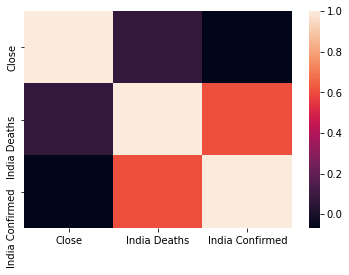

In [155]:
import seaborn as sns
sns.heatmap(india_correlation)

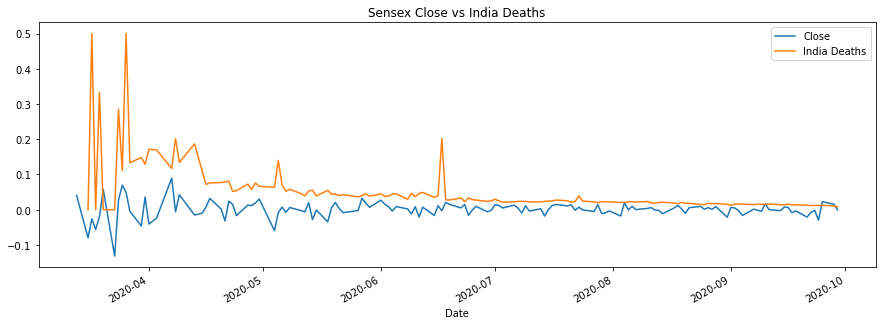

In [157]:
india[['Close', 'India Deaths']].plot(title = 'Sensex Close vs India Deaths', figsize = (15,5))